<a href="https://colab.research.google.com/github/Hotchapu13/MRI_Uganda_lab_notebooks/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Fourier Transform and Signal Processing Lab**
## Basic signal processing Lab

<p align='left'>In this lab session you will be briefly introduced to the use of the fourier transform, I hope it works out for you otherwise for any assignments here, feel free to take your time to attempt them. Focus on understanding the concepts.
</p>

<p align="center">
  <img src="https://mriquestions.com/uploads/3/4/5/7/34572113/3311485.gif?325" alt="Fourier Transform">
</p>

<p align='left'>
Also, kindly share your work in a github repo. Save the repository as <em><strong>MRI_Uganda_lab_notebooks</strong></em> and kindly make it open to the public. Any updates to this lab shall  be helpful to the future interns at the lab.
</p>

<p align='left'>
Other than that! Enjoy 😊
</p>

## Necessary imports

Scipy fft docs: https://docs.scipy.org/doc/scipy/reference/fft.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

## The Fourier Transform

### Mathematical Definition

#### Check the page https://www.tutorialspoint.com/fourier-transform-of-the-sine-and-cosine-functions for Fourier Transform of Sine and Cosine Functions

---
The **Continuous Fourier Transform (CFT)** of a continuous-time signal $x(t)$ is defined as:

$$X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi ft} dt$$

where:
- $x(t)$ is the continuous-time signal.
- $t$ is the time variable.
- $f$ is the frequency variable.
- $X(f)$ is the Fourier Transform of $x(t)$, representing the frequency content of the signal.
- $j$ is the imaginary unit ($j^2 = -1$).
- $e$ is the base of the natural logarithm.
- $\int_{-\infty}^{\infty}$ denotes the integral over all time.

---

The **Discrete Fourier Transform (DFT)** of a discrete-time signal $x[n]$ of length $N$ is defined as:

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}kn}$$

where:
- $x[n]$ is the discrete-time signal, sampled at discrete time points $n$.
- $n$ is the discrete time index, ranging from 0 to $N-1$.
- $N$ is the total number of samples in the signal.
- $k$ is the discrete frequency index, ranging from 0 to $N-1$.
- $X[k]$ is the DFT of $x[n]$, representing the frequency content at discrete frequency points.
- $\sum_{n=0}^{N-1}$ denotes the summation over all samples.

---
### Implementing DFT in Python

The Discrete Fourier Transform (DFT) is the version of the Fourier Transform used for sampled, discrete-time signals. This is the type of signal we work with in digital systems.

Libraries like NumPy and SciPy in Python provide efficient implementations of the DFT, specifically utilizing the Fast Fourier Transform (FFT) algorithm. The FFT is a computationally faster method to compute the DFT.

---
### Example 1: simple sine wave

#### Task:
Apply the DFT to a simple sine wave and visualize the results in both the time and frequency domains.

Numpy's linspace docs: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

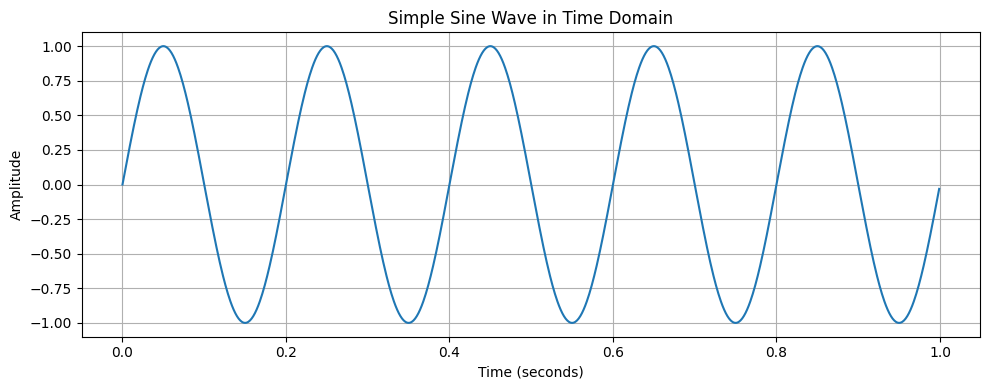

In [ ]:
# Generate a time vector
sampling_frequency = 1000  # Hz
duration = 1  # seconds
t = np.linspace(0, duration, sampling_frequency, endpoint=False)

# Create a sine wave signal
sine_frequency = 5  # Hz
sine_wave = np.sin(2 * np.pi * sine_frequency * t)

# Plot the generated sine wave in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave)
plt.title("Simple Sine Wave in Time Domain")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### Compute fft function

Numpy documentation: https://numpy.org/doc/stable/reference/index.html

In [ ]:
def compute_fft(signal, t):
    """
    Compute the Fourier Transform of the signal.

    Args:
        signal (np.array): Time domain signal
        t (np.array): Time axis

    Returns:
        tuple: (frequency axis, magnitude of FFT)
    """
    N = len(signal)
    dt = t[1] - t[0]
    freq = fftshift(fftfreq(N, dt))
    fft_signal = fftshift(fft(signal))
    magnitude = np.abs(fft_signal)
    magnitude /= np.max(magnitude)  # Normalization
    return freq, magnitude

### Plot frequency domain function

In [ ]:
def plot_frequency_domain(freq, magnitude):
    plt.figure(figsize=(10, 4))
    plt.plot(freq / 1e3, magnitude, color='orange', label="|FFT(sinc)|")
    plt.title("Fourier Transform (Magnitude) of Sinc Function")
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Normalized Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

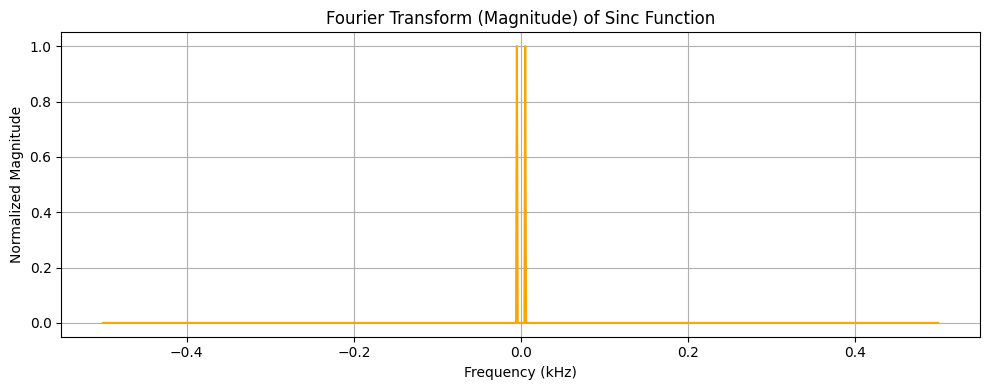

In [ ]:
# Compute the frequency components and their magnitudes
freq, magnitude = compute_fft(sine_wave, t)

# Plot the magnitude of the frequency components
plot_frequency_domain(freq, magnitude)

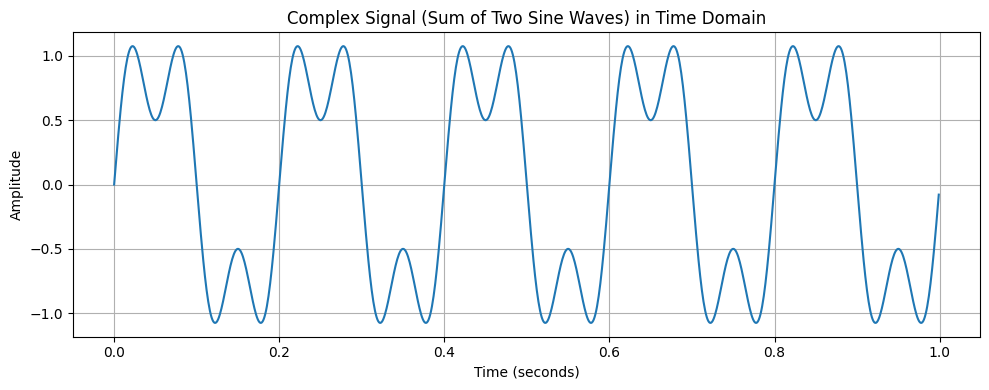

In [ ]:
# Generate a time vector
sampling_frequency = 1000  # Hz
duration = 1  # s
t = np.linspace(0, duration, sampling_frequency, endpoint=False)

# Create a complex signal by adding two sine waves
frequency1 = 5  # Hz
frequency2 = 15 # Hz
complex_signal = np.sin(2 * np.pi * frequency1 * t) + 0.5 * np.sin(2 * np.pi * frequency2 * t) # Adding two sine waves

# Plot the generated complex signal in the time domain
plt.figure(figsize=(10, 4))
plt.plot(t, complex_signal)
plt.title("Complex Signal (Sum of Two Sine Waves) in Time Domain")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

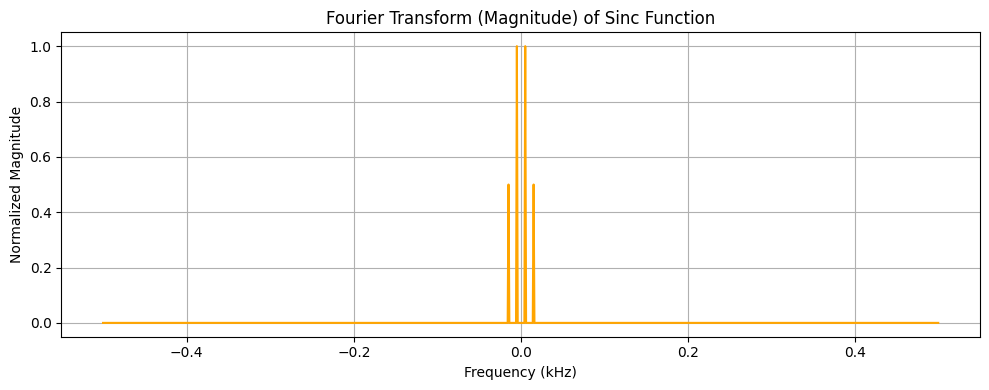

In [ ]:
# Compute the frequency components and their magnitudes
freq, magnitude = compute_fft(complex_signal, t)

# PLot in frequency domain
plot_frequency_domain(freq, magnitude)

## The Sinc Function

### Construct a basic Sinc Function

In [ ]:
def generate_sinc(t, bandwidth):
  return np.sinc(bandwidth * t)

In [ ]:
def plot_sinc(t, sinc_signal):
  plt.figure(figsize=(10, 4))
  plt.plot(t * 1e3, sinc_signal, label="sinc(t)")
  plt.title("Sinc Function in Time Domain")
  plt.xlabel("Time (ms)")
  plt.ylabel("Amplitude")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

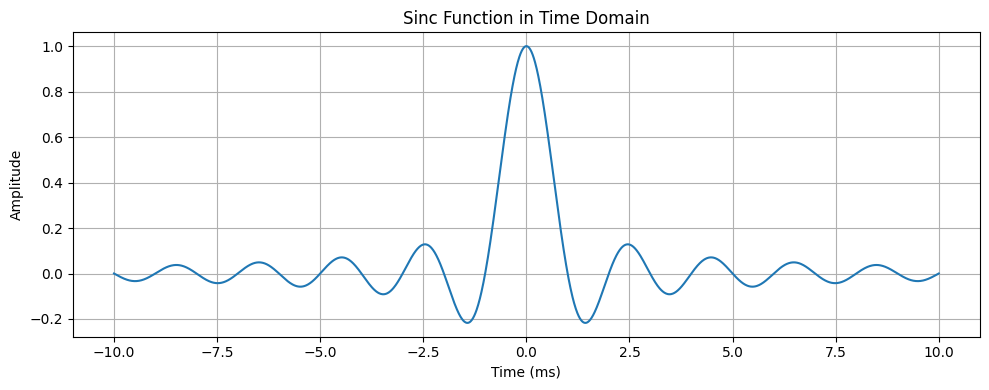

In [ ]:
bandwidth = 1000  # Hz
t = np.linspace(-0.01, 0.01, 2048)
sinc_signal = generate_sinc(t, bandwidth)
plot_sinc(t, sinc_signal)

### Sinc function in frequency domain

In [ ]:
freq, magnitude = compute_fft(sinc_signal, t)

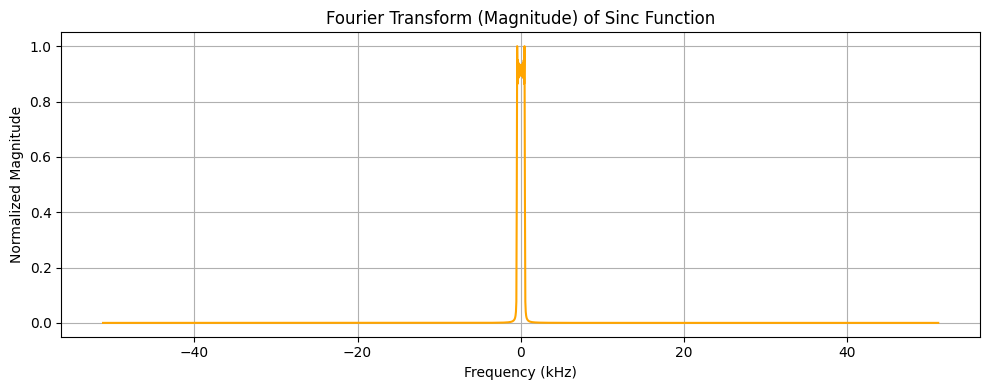

In [ ]:
plot_frequency_domain(freq, magnitude)

## **Assignment (Task 1)**
Generate waveforms represented below as s(t) and compute their respective fourier transforms.

<p align="center">
  <img src="https://mriquestions.com/uploads/3/4/5/7/34572113/9600204.gif?508" alt="Fourier Transform">
</p>

## **Assignment (Task 2)**
Review this link: https://www.3blue1brown.com/lessons/fourier-transforms and attempt all quizes there.

## **Assignment (Task 3)**
Write a function to compute the fourier transform of a sine and sinc functions using the numpy fft functions.

Here's some docs:  
- General NumPy API Reference docs: https://numpy.org/doc/stable/reference/index.html

- Fast Fourier Transform with numpy: https://numpy.org/doc/stable/reference/routines.fft.html
